# Window Functions

Shop for built-in factors here: https://www.quantopian.com/docs/api-reference/pipeline-api-reference#built-in-factors

In [1]:
# Do not change anything in this code cell.

import matplotlib.pyplot as plt
from datetime import date

# All Quantopian modules that we need in this project

# StaticAssets to get specific stocks
from quantopian.pipeline.filters import StaticAssets

# Get DailyReturns from a built-in factor
from quantopian.pipeline.data import USEquityPricing

# Customizable Pipeline object
from quantopian.pipeline import Pipeline

# Function to run a pipeline object
from quantopian.research import run_pipeline

start_date = '2014-05-01'
end_date = '2019-10-31' 

tickers = ['GOOG']

## Close Price Visualization

In [2]:
def universe():
    return StaticAssets(symbols(tickers))

def make_pipeline():        
    
    price = USEquityPricing.close.latest
    
    return Pipeline(
        columns={
            'price': price
        },
        screen=universe()
    )


p_pipe = make_pipeline()

# mdf = multi-index dataframe
p_mdf = run_pipeline(p_pipe, start_date, end_date)
p_mdf.head(5)

,,price
2014-05-01 00:00:00+00:00,Equity(46631 [GOOG]),526.93
2014-05-02 00:00:00+00:00,Equity(46631 [GOOG]),531.10
2014-05-05 00:00:00+00:00,Equity(46631 [GOOG]),527.87
2014-05-06 00:00:00+00:00,Equity(46631 [GOOG]),527.65
2014-05-07 00:00:00+00:00,Equity(46631 [GOOG]),515.14


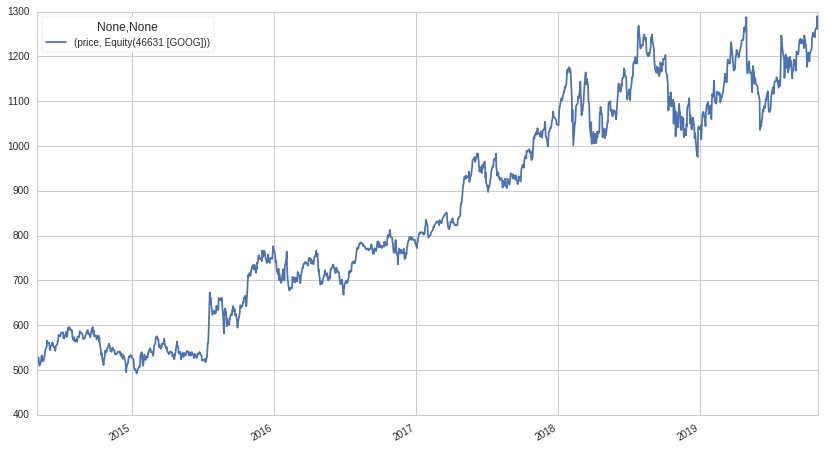

In [3]:
p_mdf.unstack().plot();

## Simple Moving Average

In [4]:
from quantopian.pipeline.factors import SimpleMovingAverage

def universe():
    return StaticAssets(symbols(tickers))

def make_pipeline():
    u = universe()
    sma = SimpleMovingAverage(
            inputs=[USEquityPricing.close],
            window_length=22,
            mask=u)
    
    return Pipeline(
        columns={
            'sma': sma
        },
        screen=u
    )


ma_pipe = make_pipeline()
ma_mdf = run_pipeline(ma_pipe, start_date, end_date)
ma_mdf.head(5)

,,sma
2014-05-01 00:00:00+00:00,Equity(46631 [GOOG]),540.785000
2014-05-02 00:00:00+00:00,Equity(46631 [GOOG]),539.609091
2014-05-05 00:00:00+00:00,Equity(46631 [GOOG]),537.823182
2014-05-06 00:00:00+00:00,Equity(46631 [GOOG]),536.034545
2014-05-07 00:00:00+00:00,Equity(46631 [GOOG]),533.552727


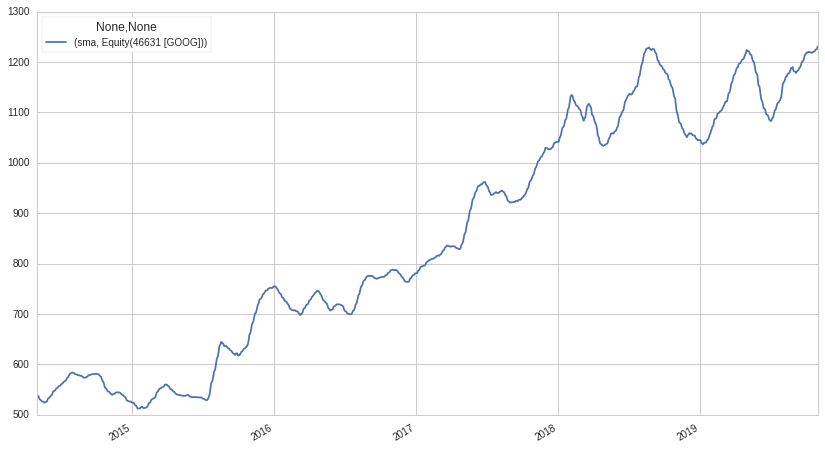

In [5]:
ma_mdf.unstack().plot();

## Compare Multiple SMAs

In [6]:
from quantopian.pipeline.factors import SimpleMovingAverage

def universe():
    return StaticAssets(symbols(tickers))

def make_pipeline():
    u = universe()
    
    sma_1mo = SimpleMovingAverage(
            inputs=[USEquityPricing.close],
            window_length=22,
            mask=u)

    sma_1y = SimpleMovingAverage(
            inputs=[USEquityPricing.close],
            window_length=253,
            mask=u)
    
    
    return Pipeline(
        columns={
            'sma_1mo': sma_1mo,
            'sma_1y': sma_1y
        },
        screen=u
    )


# multiple ma
mma_pipe = make_pipeline()
mma_mdf = run_pipeline(mma_pipe, start_date, end_date)
mma_mdf.head(5)

,,sma_1mo,sma_1y
2014-05-01 00:00:00+00:00,Equity(46631 [GOOG]),540.785000,542.321667
2014-05-02 00:00:00+00:00,Equity(46631 [GOOG]),539.609091,541.872800
2014-05-05 00:00:00+00:00,Equity(46631 [GOOG]),537.823182,541.334231
2014-05-06 00:00:00+00:00,Equity(46631 [GOOG]),536.034545,540.827407
2014-05-07 00:00:00+00:00,Equity(46631 [GOOG]),533.552727,539.910000


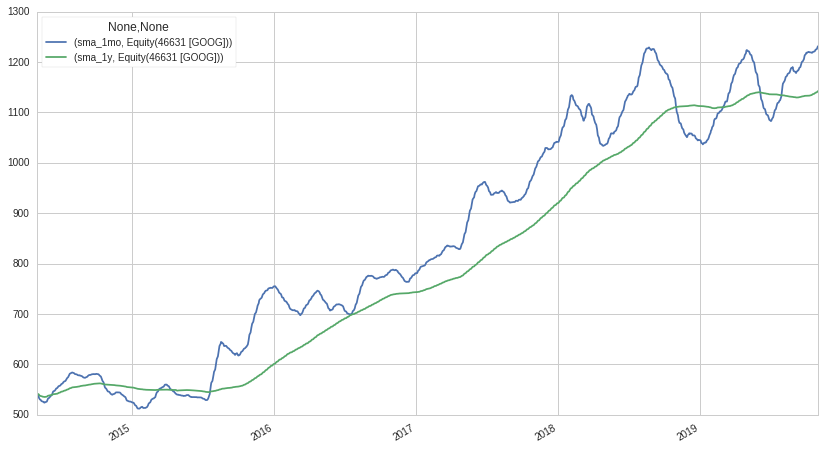

In [7]:
mma_mdf.unstack().plot();

## Exponential-Weighted Moving Average

In [8]:
from quantopian.pipeline.factors import ExponentialWeightedMovingAverage

def universe():
    return StaticAssets(symbols(tickers))

def make_pipeline():        
    u = universe()
    ema = ExponentialWeightedMovingAverage(
            inputs=[USEquityPricing.close],
            decay_rate=2.0,
            window_length=22,
            mask=u)

    return Pipeline(
        columns={
            'ema': ema
        },
        screen=u
    )


# multiple ma
ema_pipe = make_pipeline()
ema_mdf = run_pipeline(ema_pipe, start_date, end_date)
ema_mdf.head(5)

,,ema
2014-05-01 00:00:00+00:00,Equity(46631 [GOOG]),560.778351
2014-05-02 00:00:00+00:00,Equity(46631 [GOOG]),564.586695
2014-05-05 00:00:00+00:00,Equity(46631 [GOOG]),562.013381
2014-05-06 00:00:00+00:00,Equity(46631 [GOOG]),557.026753
2014-05-07 00:00:00+00:00,Equity(46631 [GOOG]),544.313493


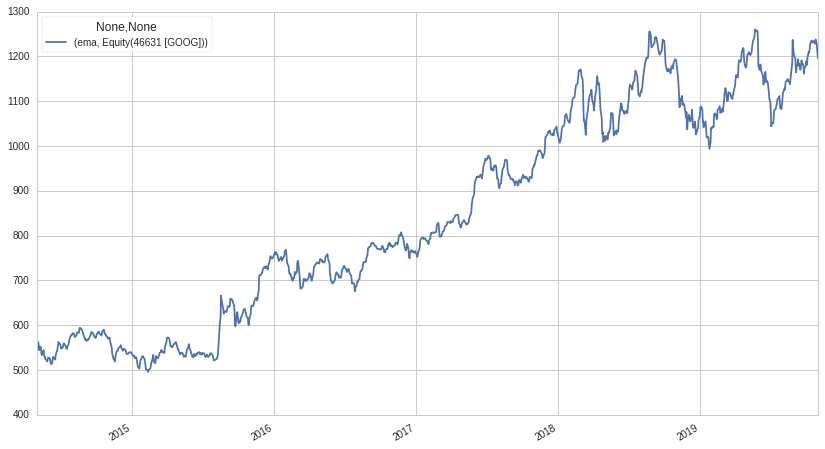

In [9]:
ema_mdf.unstack().plot();

## Max Drawdown

In [10]:
from quantopian.pipeline.factors import MaxDrawdown

def universe():
    return StaticAssets(symbols(tickers))

def make_pipeline():
    u = universe()
    
    md = MaxDrawdown(
            inputs=[USEquityPricing.close],
            window_length=63,
            mask=u)
    
    return Pipeline(
        columns={
            'md': md
        },
        screen=u
    )


md_pipe = make_pipeline()
md_mdf = run_pipeline(md_pipe, start_date, end_date)
md_mdf.head(5)

,,md
2014-05-01 00:00:00+00:00,Equity(46631 [GOOG]),0.104126
2014-05-02 00:00:00+00:00,Equity(46631 [GOOG]),0.104126
2014-05-05 00:00:00+00:00,Equity(46631 [GOOG]),0.104126
2014-05-06 00:00:00+00:00,Equity(46631 [GOOG]),0.104126
2014-05-07 00:00:00+00:00,Equity(46631 [GOOG]),0.105991


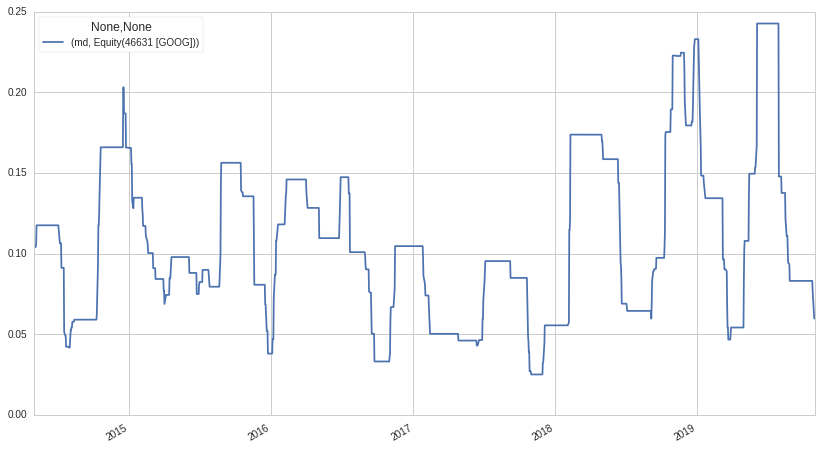

In [11]:
md_mdf.unstack().plot();

## Bollinger Bands

In [12]:
from quantopian.pipeline.factors import BollingerBands

def universe():
    return StaticAssets(symbols(tickers))

def make_pipeline():
    
    u = universe()
    
    bb1, bb2, bb3 = BollingerBands(
            inputs=[USEquityPricing.close],
            window_length=22,
            k=2,
            mask=u)
    
    return Pipeline(
        columns={
            'bb_band1': bb1,
            'bb_ma': bb2,
            'bb_band2': bb3,
            'price': USEquityPricing.close.latest
        },
        screen=u
    )


bb_pipe = make_pipeline()
bb_mdf = run_pipeline(bb_pipe, '2019-08-01', end_date)
bb_mdf.head(5)

,,bb_band1,bb_band2,bb_ma,price
2019-08-01 00:00:00+00:00,Equity(46631 [GOOG]),1071.727678,1232.459867,1152.093773,1216.68
2019-08-02 00:00:00+00:00,Equity(46631 [GOOG]),1077.071265,1237.217190,1157.144227,1209.01
2019-08-05 00:00:00+00:00,Equity(46631 [GOOG]),1081.961808,1239.801192,1160.881500,1193.99
2019-08-06 00:00:00+00:00,Equity(46631 [GOOG]),1085.075187,1239.451449,1162.263318,1152.32
2019-08-07 00:00:00+00:00,Equity(46631 [GOOG]),1087.964938,1240.024426,1163.994682,1169.36


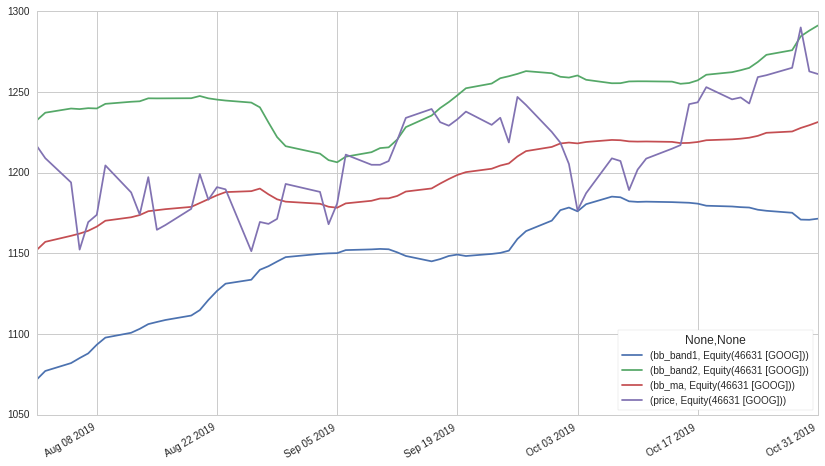

In [13]:
bb_mdf.unstack().plot();